<a href="https://colab.research.google.com/github/kthanikonda/DataWithPython/blob/main/Real_Estate_Project-2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Dataset Selection and Initial Exploration

**Dataset:** Real Estate Sales Data (2001-2022)

**Source:** https://www.kaggle.com/datasets/omniamahmoudsaeed/real-estate-sales-2001-2022

**About Dataset:** This dataset provides detailed information about property sales over two decades, from 2001 to 2022. It contains records of property transactions, including the town of sale, sale amounts, assessed values, property types, and remarks from assessors. The dataset is suitable for analyzing real estate trends, valuation accuracy, and geographic property distributions.

### About the Columns in the Dataset

This dataset contains information about property sales. Below is what each column represents:

1. **Serial Number -** A unique ID for each property.  
2. **List Year -** The year the property was listed for sale.  
3. **Date Recorded -** When the sale was officially recorded.  
4. **Town -** The city or town where the property is located.  
5. **Address -** The street address of the property.  
6. **Assessed Value -** The value assigned for tax purposes.  
7. **Sale Amount -** The actual price the property sold for.  
8. **Sales Ratio -** Compares the sale price to the assessed value.  
9. **Property Type -** The type of property (e.g., Residential, Commercial).  
10. **Residential Type -** If residential, the specific type (e.g., Single Family).  
11. **Non Use Code -** Codes for properties not typically used (e.g., vacant land).  
12. **Assessor Remarks -** Additional notes from the assessor.  
13. **OPM Remarks -** Notes from the Office of Property Management.  
14. **Location -** The exact geographic coordinates (latitude and longitude).



# 2. Importing the Dataset into Colab

*   To begin the analysis, we first upload the dataset to Google Colab using the `files.upload()` method provided by `google.colab`. After uploading, we read the dataset using `pandas` and `pd.read_csv`.
*   We display the first few rows to get an initial idea of what the data looks like using `df.head()`


In [ ]:
from google.colab import files
import os

uploaded = files.upload()

Saving Real_Estate_Sales_2001-2022_GL.csv to Real_Estate_Sales_2001-2022_GL (2).csv


In [ ]:
import pandas as pd

df = pd.read_csv("Real_Estate_Sales_2001-2022_GL.csv")

df.head()

<ipython-input-100-50b421269604>:3: DtypeWarning: Columns (8,9,10,11,12) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("Real_Estate_Sales_2001-2022_GL.csv")


,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Non Use Code,Assessor Remarks,OPM remarks,Location
0,2020177,2020,04/14/2021,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,NaN,NaN,NaN,POINT (-73.06822 41.35014)
1,2020225,2020,05/26/2021,Ansonia,152 JACKSON ST,110500.0,239900.0,0.4606,Residential,Three Family,NaN,NaN,NaN,NaN
2,2020348,2020,09/13/2021,Ansonia,230 WAKELEE AVE,150500.0,325000.0,0.4630,Commercial,NaN,NaN,NaN,NaN,NaN
3,2020090,2020,12/14/2020,Ansonia,57 PLATT ST,127400.0,202500.0,0.6291,Residential,Two Family,NaN,NaN,NaN,NaN
4,210288,2021,06/20/2022,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,NaN,NaN,NaN,POINT (-72.879115982 41.773452988)


### Initial Questions / Areas of Interest

1. **How have average property sale prices evolved over the years (2001-2022)?**  
   We want to explore trends in property values and identify any significant market shifts.

2. **Is there a significant discrepancy between assessed value and sale price (Sales Ratio) by town or property type?**  
   This will help evaluate the fairness or accuracy of property tax assessments.

3. **Which towns have the highest volume of property transactions, and do they follow similar pricing trends?**  
   Understanding geographic patterns in sales could reveal urban growth or demand hotspots.


# 3. Data Import and Cleaning

In this section, We examine the dataset for missing values, inconsistent data, and incorrect data types. We also perform appropriate cleaning steps to ensure the dataset is ready for analysis.


## 3.1 Using .info()

We use the `.info()` method to get a concise summary of the dataset, which includes:

* The number of non-null values in each column,

* The data types of each column,

* The overall structure of the DataFrame.

This helps us quickly identify which columns have missing values and whether any columns need type conversion before further analysis.

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1097629 entries, 0 to 1097628
Data columns (total 14 columns):
 #   Column            Non-Null Count    Dtype  
---  ------            --------------    -----  
 0   Serial Number     1097629 non-null  int64  
 1   List Year         1097629 non-null  int64  
 2   Date Recorded     1097627 non-null  object 
 3   Town              1097629 non-null  object 
 4   Address           1097578 non-null  object 
 5   Assessed Value    1097629 non-null  float64
 6   Sale Amount       1097629 non-null  float64
 7   Sales Ratio       1097629 non-null  float64
 8   Property Type     715183 non-null   object 
 9   Residential Type  699240 non-null   object 
 10  Non Use Code      313451 non-null   object 
 11  Assessor Remarks  171228 non-null   object 
 12  OPM remarks       13031 non-null    object 
 13  Location          298111 non-null   object 
dtypes: float64(3), int64(2), object(9)
memory usage: 117.2+ MB


## 3.2 Using .describe()

We use the `.describe()` method to generate summary statistics for all numeric columns in the dataset. This includes:

* Count of non-null entries

* Mean,standard deviation, minimum,maximum

* 25th ,50th (median),75th values

These statistics help us understand the distribution,spread, and potential outliersin the numbersSale Amount, Assessed Value, and Sales Ratio



In [ ]:
df.describe()

,Serial Number,List Year,Assessed Value,Sale Amount,Sales Ratio
count,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06,1.097629e+06
mean,5.370357e+05,2.011218e+03,2.818016e+05,4.053146e+05,9.603926e+00
std,7.526074e+06,6.773485e+00,1.657890e+06,5.143492e+06,1.801664e+03
min,0.000000e+00,2.001000e+03,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.071300e+04,2.005000e+03,8.909000e+04,1.450000e+05,4.778667e-01
50%,8.070600e+04,2.011000e+03,1.405800e+05,2.330000e+05,6.105663e-01
75%,1.703410e+05,2.018000e+03,2.282700e+05,3.750000e+05,7.707200e-01
max,2.000500e+09,2.022000e+03,8.815100e+08,5.000000e+09,1.226420e+06



## 3.3 Using .isnull().sum()

We use the `.isnull().sum()` function to identify the number of missing (null) values in each column of the dataset.

This helps us:

* Quantify how many values are missing per column

* Detect incomplete data that may affect analysis

* Make informed decisions about data cleaning strategies (e.g., drop or fill)

This is an essential step before handling missing data



In [ ]:
df.isnull().sum()

,0
Serial Number,0
List Year,0
Date Recorded,2
Town,0
Address,51
Assessed Value,0
Sale Amount,0
Sales Ratio,0
Property Type,382446
Residential Type,398389


## 3.4 Analyse the Missing values

*  To understand the extent of missing data in our dataset, we calculate the percentage of missing values for each column. This helps identify which columns require data cleaning actions such as imputation, default value assignment, or removal due to excessive missing data.
*   We sort the columns in descending order of missing percentage to prioritize the most problematic fields first




In [6]:
# See % of missing values
missing_percent = (df.isnull().sum() / len(df)) * 100
missing_percent.sort_values(ascending=False)

NameError: name 'df' is not defined

## 3.5 Cleaning the dataset

### 3.5.1: Removing Columns with Excessive Missing Data

To ensure the dataset is reliable and ready for analysis, we take the following cleaning actions:

* We created a copy of the original DataFrame called `real_estate_df` to ensure the raw data remains unchanged and accessible for future reference if needed.

* As part of our data cleaning process, we first removed columns where the number of missing values exceeded the number of available (non-null) values.

* The following columns were dropped:
  1. Non Use Code  
  2. Assessor Remarks  
  3. OPM Remarks

These columns contained a significant percentage of null entries, often more than 50%, and did not provide consistently usable information across records.

This helps streamline our dataset by retaining only columns with meaningful and usable data.

In [ ]:
# Copy the original DataFrame to preserve raw data
real_estate_df = df.copy()
print(" Original DataFrame copied to 'cleaned_df'.")

# Drop columns with too many missing values
columns_to_drop = ['Non Use Code', 'Assessor Remarks', 'OPM remarks']
real_estate_df.drop(columns=[col for col in columns_to_drop if col in cleaned_df.columns], inplace=True)
print(f"Dropped columns: {columns_to_drop}")

 Original DataFrame copied to 'cleaned_df'.
Dropped columns: ['Non Use Code', 'Assessor Remarks', 'OPM remarks']
Remaining rows after cleaning: 214091
<class 'pandas.core.frame.DataFrame'>
Index: 214091 entries, 0 to 1097628
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Serial Number     214091 non-null  int64  
 1   List Year         214091 non-null  int64  
 2   Date Recorded     214091 non-null  object 
 3   Town              214091 non-null  object 
 4   Address           214091 non-null  object 
 5   Assessed Value    214091 non-null  float64
 6   Sale Amount       214091 non-null  float64
 7   Sales Ratio       214091 non-null  float64
 8   Property Type     214091 non-null  object 
 9   Residential Type  214091 non-null  object 
 10  Location          214091 non-null  object 
dtypes: float64(3), int64(2), object(6)
memory usage: 19.6+ MB


### 3.5.2 Handling Rows with Missing Critical Fields

* We remove rows that are missing values in critical fields required for analysis, as these fields are essential for understanding the property sale context and cannot be imputed accurately.

* The fields we consider critical are:

  1. Date Recorded – Needed for time based analysis.

  2. Address – Required for property identification.

  3. Location – Essential for geographic mapping and spatial trends.

  4. Residential Type – Important for segmenting residential categories.

  5. Property Type – Differentiates between residential, commercial, and other property types.

After removing rows with missing values in these columns, we print the number of remaining rows and inspect the structure of the cleaned DataFrame using .info()

In [ ]:
real_estate_df = df.dropna(subset=['Date Recorded', 'Address', 'Location','Residential Type', 'Property Type' ])

print("Remaining rows after cleaning:", len(real_estate_df))
real_estate_df.info()


### 3.5.3 Converting Date format and Extracting Location Coordinates

* In this part, we cleaned up the Date Recorded column and worked with the Location column:

  1. First, we converted the Date Recorded column into proper datetime format so we can easily filter or sort the data by date. If any date couldn't be converted maybe it was written wrong, we allowed it to turn into a missing value

  2. Next, we focused on the Location column, which holds both longitude and latitude together in a format like this: POINT (-72.345 41.678). We separated the longitude and latitude into two new columns using pattern matching.

  3. Finally, we made sure both Longitude and Latitude columns are in numeric format so we can use them for location based analysis or plotting maps later.




In [ ]:
# Convert 'Date Recorded' to datetime format
real_estate_df['Date Recorded'] = pd.to_datetime(real_estate_df['Date Recorded'], errors='coerce')
print("Converted 'Date Recorded' to datetime format.")

#  Extract coordinates from 'Location' column
real_estate_df['Longitude'] = real_estate_df['Location'].str.extract(r'POINT \((-?\d+\.\d+)')
real_estate_df['Latitude'] = real_estate_df['Location'].str.extract(r'POINT \(-?\d+\.\d+ (\d+\.\d+)')

# Convert extracted coordinates to numeric (float)
real_estate_df['Longitude'] = pd.to_numeric(real_estate_df['Longitude'], errors='coerce')
real_estate_df['Latitude'] = pd.to_numeric(real_estate_df['Latitude'], errors='coerce')
print(" Extracted and converted 'Longitude' and 'Latitude' from 'Location' column.")


<ipython-input-120-479132b41c89>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Date Recorded'] = pd.to_datetime(cleaned_df['Date Recorded'], errors='coerce')


Converted 'Date Recorded' to datetime format.


<ipython-input-120-479132b41c89>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Longitude'] = cleaned_df['Location'].str.extract(r'POINT \((-?\d+\.\d+)')


 Extracted and converted 'Longitude' and 'Latitude' from 'Location' column.


<ipython-input-120-479132b41c89>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Latitude'] = cleaned_df['Location'].str.extract(r'POINT \(-?\d+\.\d+ (\d+\.\d+)')
<ipython-input-120-479132b41c89>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Longitude'] = pd.to_numeric(cleaned_df['Longitude'], errors='coerce')
<ipython-input-120-479132b41c89>:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = 

### 3.5.4 Dropping Rows with Missing Coordinates

* After extracting latitude and longitude from the Location column, we found that some rows had missing (null) values in these new columns.

* Since accurate location data is important for geographic analysis and visualizations, we decided to drop those rows. Keeping them would limit our ability to map or analyze property sales by location.

* This step helps keep the dataset clean and ensures that all remaining records have valid coordinates.

In [ ]:
real_estate_df = real_estate_df.dropna(subset=['Longitude', 'Latitude'])


* We use `.duplicated().sum()` to check how many fully duplicated rows are in the dataset. This helps us identify and remove any exact duplicate records to keep the data clean and accurate.

In [ ]:
num_full_duplicates = real_estate_df.duplicated().sum()
print(f"Number of fully duplicated rows: {num_full_duplicates}")


Number of fully duplicated rows: 0


* We are checking how many rows have a sale amount of 0. These rows probably don’t represent actual sales, so we might need to remove them to make sure our analysis is accurate.


In [ ]:
zero_sales_count = (real_estate_df['Sale Amount'] == 0).sum()
print(f"Rows with Sale Amount = 0: {zero_sales_count}")

Rows with Sale Amount = 0: 18


* We created a new column called Valid Sale to mark whether each sale amount is greater than 0. This helps us easily count how many records are actual sales and how many are not. Then, we used `.value_counts()` to see the total number of valid vs. invalid sales.

In [ ]:
real_estate_df['Valid Sale'] = real_estate_df['Sale Amount'] > 0

print(" Count of valid and invalid sales:")
print(real_estate_df['Valid Sale'].value_counts())


 Count of valid and invalid sales:
Valid Sale
True     214072
False        18
Name: count, dtype: int64


* We display the first 10 rows of the `Sale Amount` and `Valid Sale` columns to double check that the new `Valid Sale` column is working correctly. It should show `True` where the sale amount is greater than 0, and `False` otherwise.

In [ ]:
real_estate_df[['Sale Amount', 'Valid Sale']].head(10)


,Sale Amount,Valid Sale
0,248400.0,True
4,362500.0,True
6,775000.0,True
32,130000.0,True
37,540000.0,True
40,197000.0,True
51,42500.0,True
54,325000.0,True
65,175000.0,True
75,165000.0,True


* We print the total number of records in the cleaned dataset using `len(real_estate_df)`. This helps us confirm how many rows are available after all the cleaning steps.

In [ ]:

print(f" Total records in cleaned_df: {len(real_estate_df)}")


 Total records in cleaned_df: 214090


* We created a new column called `Valid Assessed` to check whether each property's `Assessed Value` is greater than 0. This helps us identify and count how many records have valid assessed values. Then we use `.value_counts()` to see how many are valid `True` and how many are not `False`.

In [8]:
real_estate_df['Valid Assessed'] = real_estate_df['Assessed Value'] > 0
print("\nThe valid assessed value counts:")
print(real_estate_df['Valid Assessed'].value_counts())


NameError: name 'real_estate_df' is not defined

* We cleaned up the text data in the `Town`, `Property Type`, and `Residential Type` columns by removing any extra spaces using `.str.strip()` and converting the text to title case using `.str.title()`.

In [ ]:
for col in ['Town', 'Property Type', 'Residential Type']:
   real_estate_df[col] = real_estate_df[col].str.strip().str.title()


### 3.5.5 Cleaned Data Overview
After all the cleaning steps like dropping missing values, fixing data types, and splitting coordinates, we now check the structure of our cleaned dataset using `.info()`.

* All the important columns are present.
* There are no obvious data type issues.
* We have handled missing values properly.

In [ ]:

# Showing the result of cleaning
print("\n Cleaned DataFrame Overview:")
print(real_estate_df.info())


* We use `.head()` to show the first few rows of the cleaned dataset, which helps us quickly verify that the data looks correct after all the cleaning steps.

In [ ]:
print("\n First few rows of cleaned data:")
print(real_estate_df.head())

,Serial Number,List Year,Date Recorded,Town,Address,Assessed Value,Sale Amount,Sales Ratio,Property Type,Residential Type,Location,Longitude,Latitude,Valid Sale,Valid Assessed
0,2020177,2020,2021-04-14,Ansonia,323 BEAVER ST,133000.0,248400.0,0.5354,Residential,Single Family,POINT (-73.06822 41.35014),-73.068220,41.350140,True,True
4,210288,2021,2022-06-20,Avon,12 BYRON DRIVE,179990.0,362500.0,0.4965,Residential,Condo,POINT (-72.879115982 41.773452988),-72.879116,41.773453,True,True
6,200121,2020,2020-12-15,Avon,63 NORTHGATE,528490.0,775000.0,0.6819,Residential,Single Family,POINT (-72.89675 41.79445),-72.896750,41.794450,True,True
32,212150,2021,2022-08-30,Bridgeport,126 KENNEDY DR,70850.0,130000.0,0.5450,Residential,Condo,POINT (-73.221583028 41.214441988),-73.221583,41.214442,True,True
37,20188,2020,2021-07-19,Burlington,206 COVEY RD,286860.0,540000.0,0.5312,Residential,Single Family,POINT (-72.97635 41.79258),-72.976350,41.792580,True,True


* We use `.isnull().sum()` to check how many missing values are present in each column of the dataset, which helps us verify that missing data has been properly handled after the cleaning steps.

In [10]:
real_estate_df.isnull().sum()

NameError: name 'real_estate_df' is not defined

* We are using `.describe()` to check the summary statistics for the cleaned dataset, which helps us understand the distribution, range, and central tendencies of the numeric columns.

In [11]:
real_estate_df.describe()

NameError: name 'real_estate_df' is not defined

In [ ]:
real_estate_df.to_csv('cleaned_real_estate_data.csv', index=False)


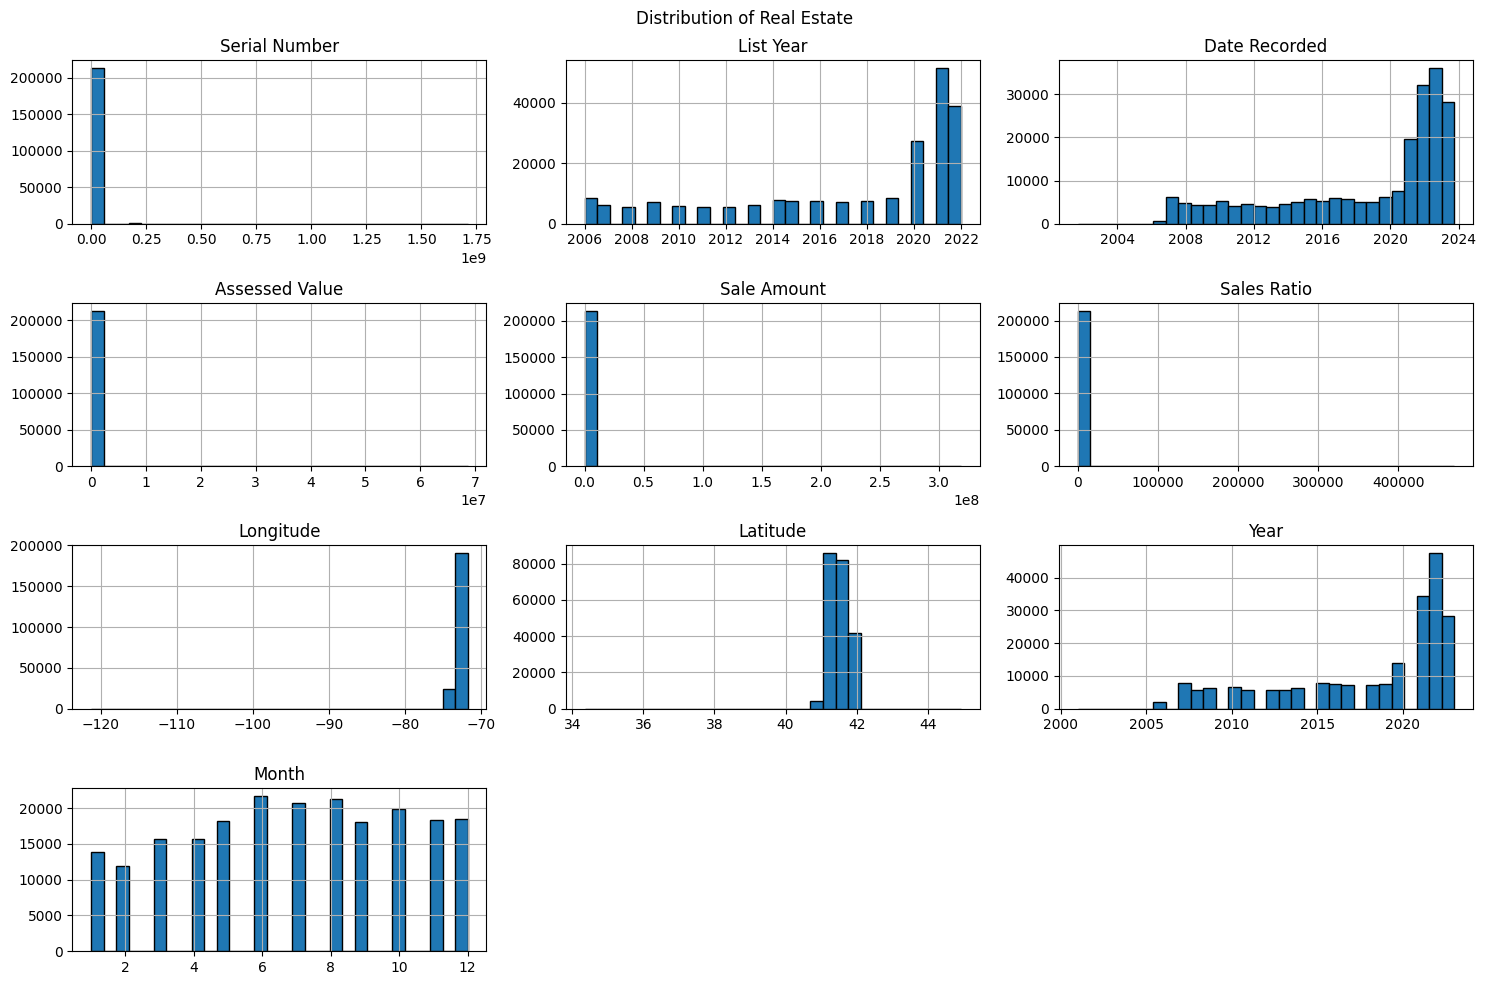

In [ ]:

real_estate_df.hist(figsize=(15,10),
                              bins=30,
                              edgecolor="black")
plt.subplots_adjust(hspace=0.7, wspace=0.4)
plt.suptitle("Distribution of Real Estate")
plt.tight_layout()


In [ ]:
summary = cleaned_df[['Sale Amount', 'Assessed Value', 'Sales Ratio']].describe().T
summary.style.background_gradient(cmap='Blues').format("{:,.2f}")

,count,mean,std,min,25%,50%,75%,max
Sale Amount,"214,090.00","415,593.73","1,114,361.76",0.00,"175,000.00","275,000.00","425,000.00","318,790,019.00"
Assessed Value,"214,090.00","254,614.27","914,932.48",0.00,"110,390.00","160,075.00","248,885.00","68,646,970.00"
Sales Ratio,"214,090.00",7.20,"2,668.58",0.00,0.49,0.59,0.74,"1,226,420.00"


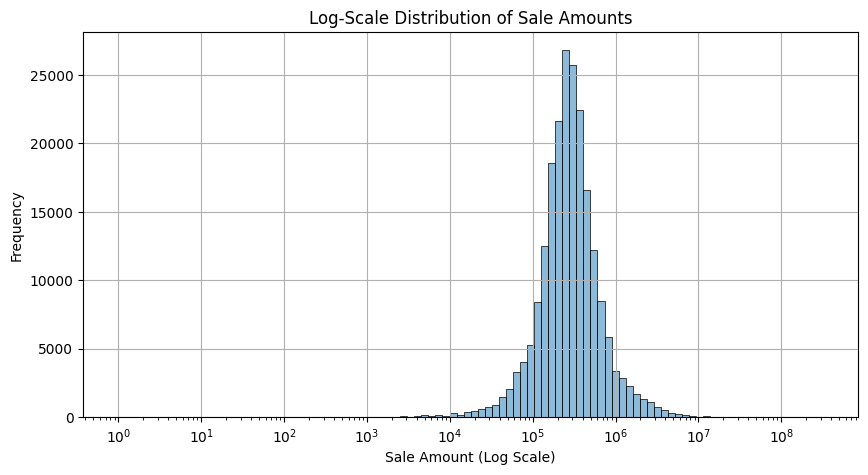

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.histplot(cleaned_df['Sale Amount'], kde=True, bins=100, log_scale=(True, False))
plt.title('Log-Scale Distribution of Sale Amounts')
plt.xlabel('Sale Amount (Log Scale)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


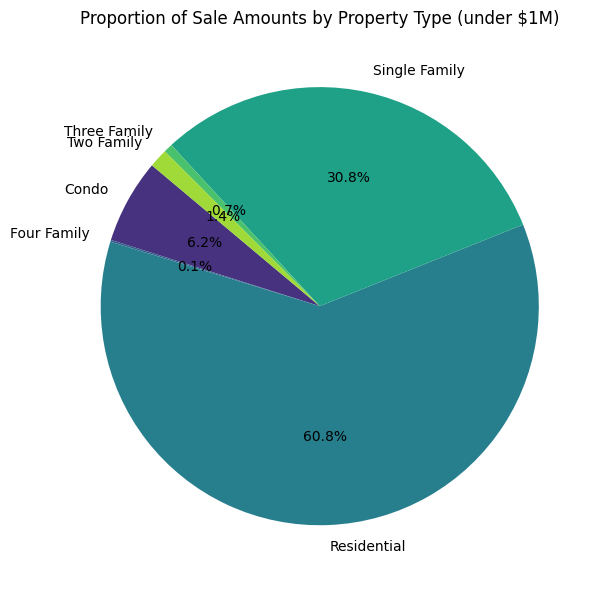

In [ ]:
# Filter data
filtered_df = cleaned_df[cleaned_df['Sale Amount'] < 1_000_000]

# Group by property type and sum sale amount
grouped = filtered_df.groupby('Property Type')['Sale Amount'].sum()

# Plot pie chart
plt.figure(figsize=(10, 6))
plt.pie(grouped,
        labels=grouped.index,
        autopct='%1.1f%%',
        startangle=140,
        colors = sns.color_palette("viridis", len(grouped)))

plt.title('Proportion of Sale Amounts by Property Type (under $1M)')
plt.tight_layout()
plt.show()

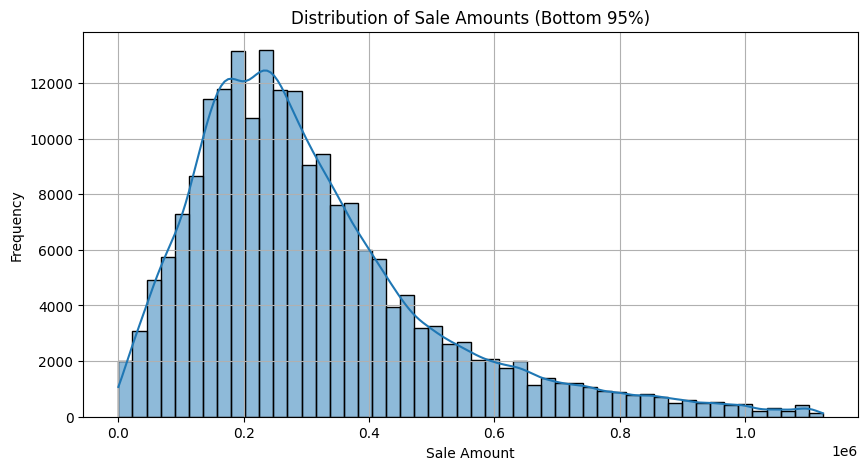

In [ ]:
plt.figure(figsize=(10, 5))
filtered = cleaned_df[cleaned_df['Sale Amount'] < cleaned_df['Sale Amount'].quantile(0.95)]

sns.histplot(filtered['Sale Amount'], kde=True, bins=50)
plt.title('Distribution of Sale Amounts (Bottom 95%)')
plt.xlabel('Sale Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()


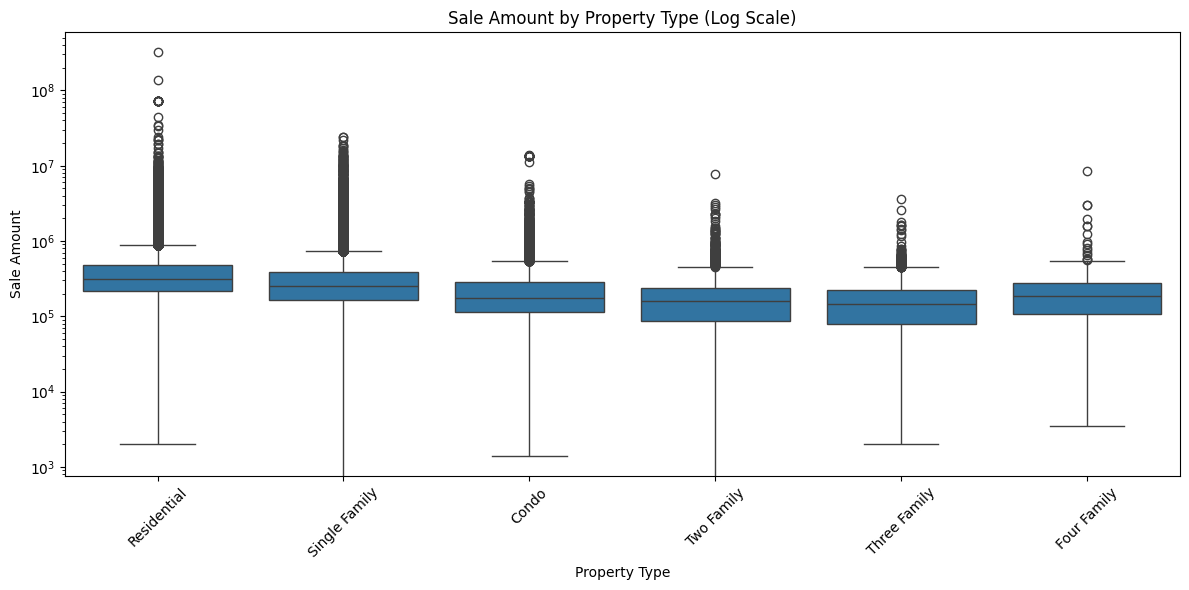

In [ ]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=cleaned_df, x='Property Type', y='Sale Amount')
plt.yscale('log')
plt.xticks(rotation=45)
plt.title('Sale Amount by Property Type (Log Scale)')
plt.tight_layout()
plt.show()

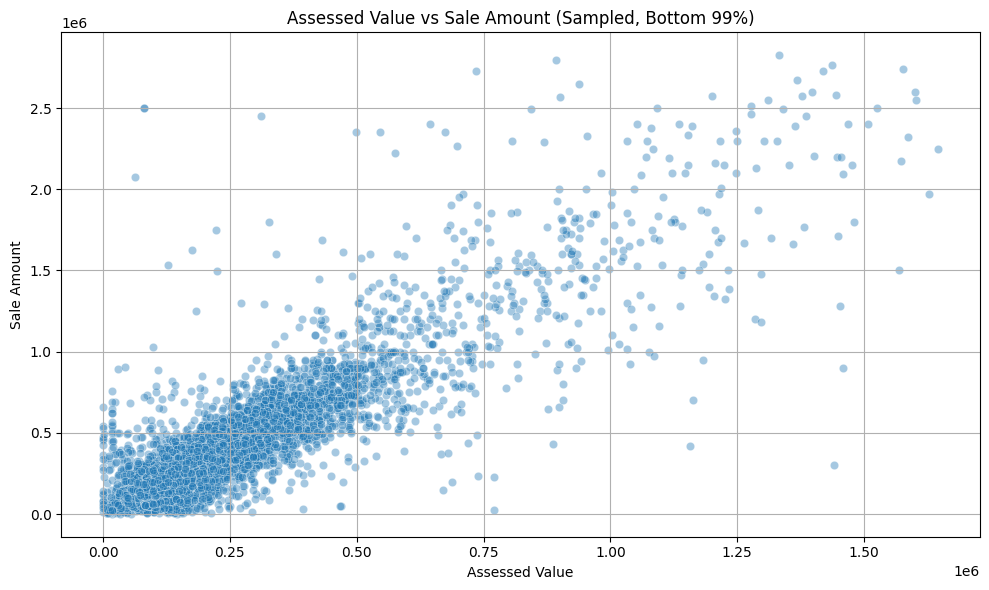

In [ ]:
sample_scatter = cleaned_df[
    (cleaned_df['Assessed Value'] < cleaned_df['Assessed Value'].quantile(0.99)) &
    (cleaned_df['Sale Amount'] < cleaned_df['Sale Amount'].quantile(0.99))
].sample(10000, random_state=42)

plt.figure(figsize=(10, 6))
sns.scatterplot(data=sample_scatter, x='Assessed Value', y='Sale Amount', alpha=0.4)
plt.title('Assessed Value vs Sale Amount (Sampled, Bottom 99%)')
plt.grid(True)
plt.tight_layout()
plt.show()


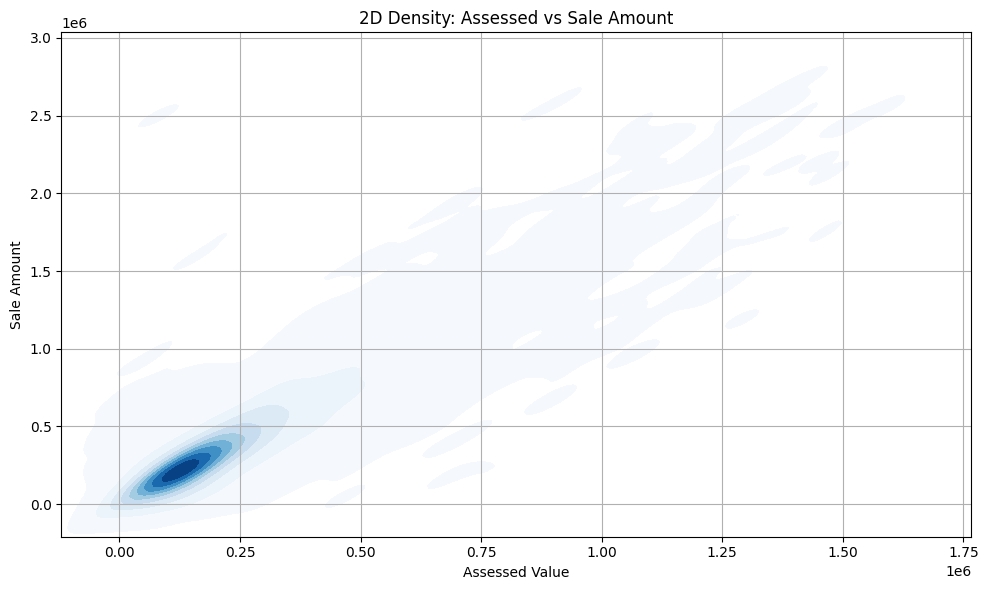

In [ ]:
plt.figure(figsize=(10, 6))
sns.kdeplot(
    data=sample_scatter,
    x="Assessed Value", y="Sale Amount",
    fill=True, cmap="Blues", thresh=0.01
)
plt.title('2D Density: Assessed vs Sale Amount')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-146-a691fbd6f745>:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  cleaned_df['Sales Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)


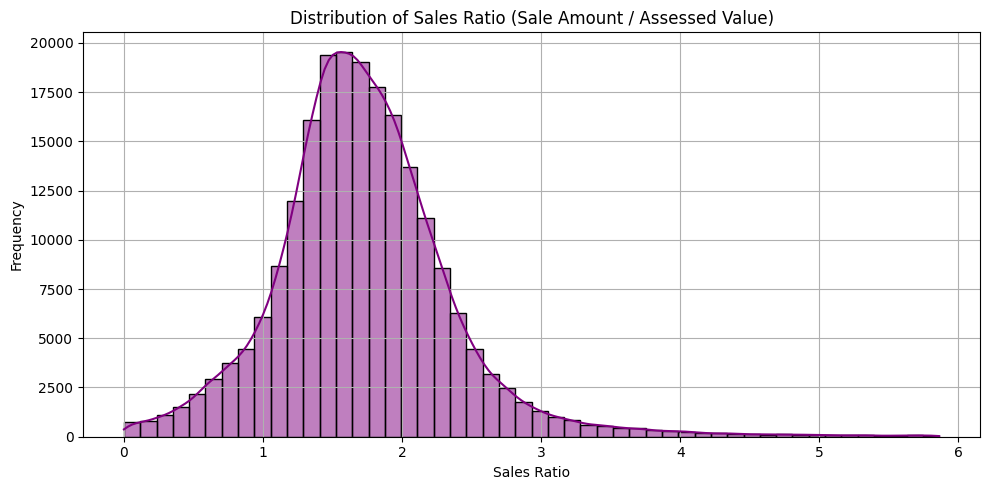

In [ ]:
#Distribution Of Sales Ration

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 1: Create Sales Ratio if not already present
cleaned_df['Sales Ratio'] = cleaned_df['Sale Amount'] / cleaned_df['Assessed Value']
cleaned_df['Sales Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)
sales_ratio_filtered = cleaned_df['Sales Ratio'].dropna()
sales_ratio_filtered = sales_ratio_filtered[sales_ratio_filtered < sales_ratio_filtered.quantile(0.99)]

# Step 2: Plot the distribution
plt.figure(figsize=(10, 5))
sns.histplot(sales_ratio_filtered, kde=True, bins=50, color='purple')
plt.title('Distribution of Sales Ratio (Sale Amount / Assessed Value)')
plt.xlabel('Sales Ratio')
plt.ylabel('Frequency')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-147-178d3a20e1a2>:5: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(data=filtered_res, x='Residential Type', y='Sale Amount', estimator=np.mean, ci=None)


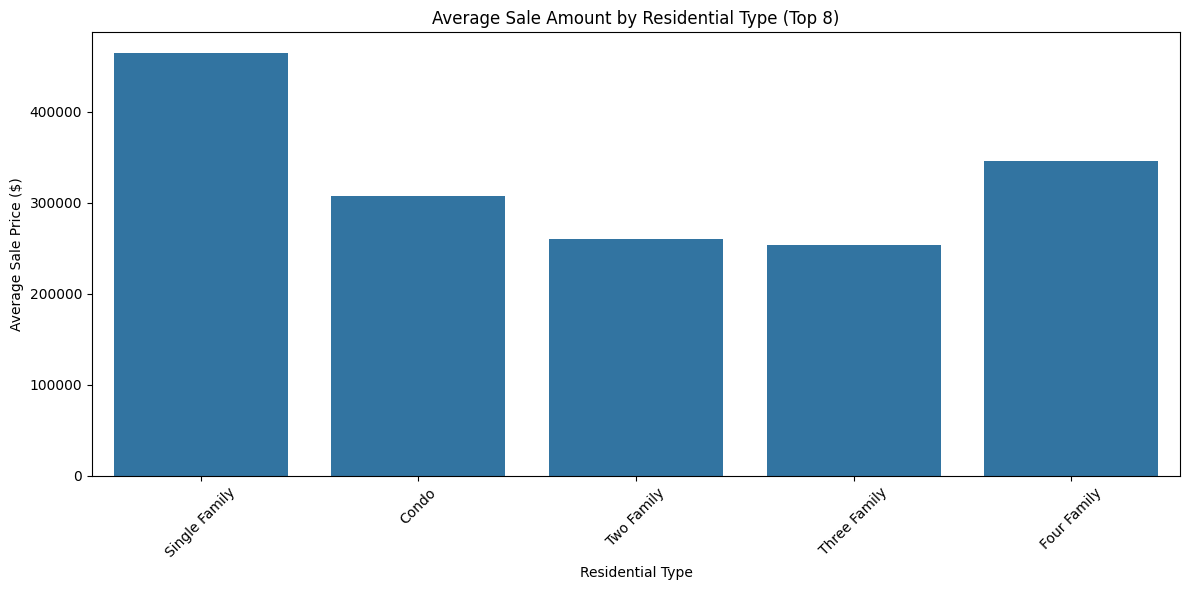

In [ ]:
top_res_types = cleaned_df['Residential Type'].value_counts().head(8).index
filtered_res = cleaned_df[cleaned_df['Residential Type'].isin(top_res_types)]

plt.figure(figsize=(12, 6))
sns.barplot(data=filtered_res, x='Residential Type', y='Sale Amount', estimator=np.mean, ci=None)
plt.title('Average Sale Amount by Residential Type (Top 8)')
plt.xticks(rotation=45)
plt.ylabel('Average Sale Price ($)')
plt.tight_layout()
plt.show()




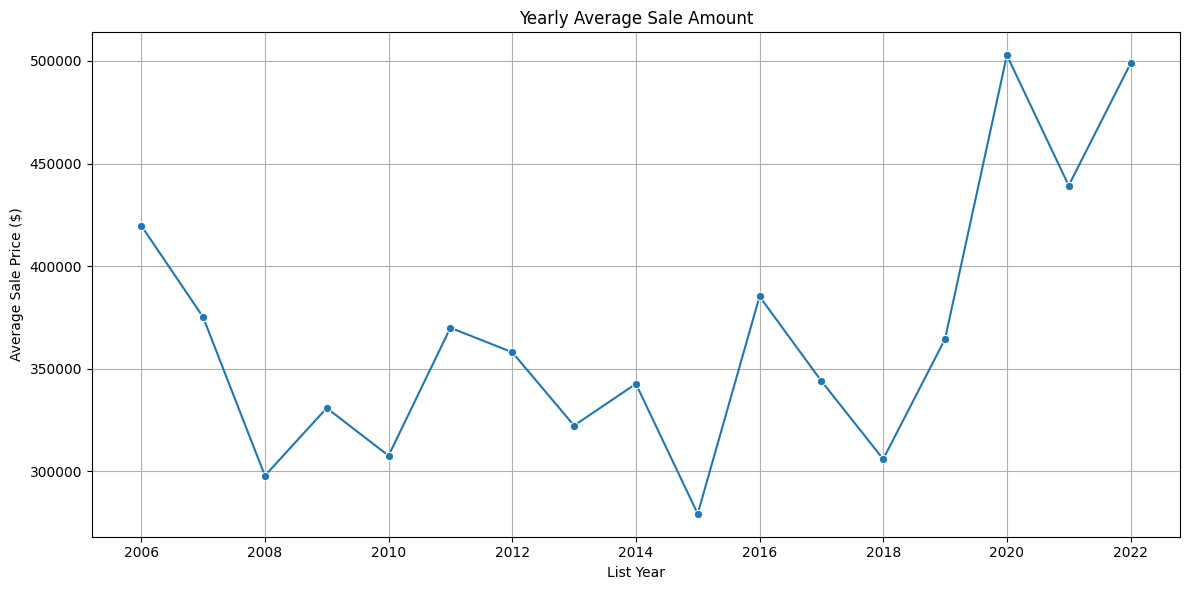

In [ ]:
yearly_avg = cleaned_df.groupby('List Year')['Sale Amount'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=yearly_avg, x='List Year', y='Sale Amount', marker='o')
plt.title('Yearly Average Sale Amount')
plt.ylabel('Average Sale Price ($)')
plt.grid(True)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# Ensure datetime is correct
cleaned_df['Date Recorded'] = pd.to_datetime(cleaned_df['Date Recorded'], errors='coerce')
cleaned_df['Year'] = cleaned_df['Date Recorded'].dt.year
cleaned_df['Month'] = cleaned_df['Date Recorded'].dt.month

# Group and count transactions
monthly_trx = cleaned_df.groupby(['Year', 'Month']).size().reset_index(name='Transaction Count')

# Get peak month for each year
peak_months_by_year = monthly_trx.loc[monthly_trx.groupby('Year')['Transaction Count'].idxmax()].sort_values('Year')
peak_months_by_year


,Year,Month,Transaction Count
0,2001,9,2
1,2004,7,1
2,2005,8,1
4,2006,10,747
14,2007,8,863
24,2008,6,627
41,2009,11,742
48,2010,6,934
60,2011,6,652
74,2012,8,603


<ipython-input-176-9fadc5a423a9>:19: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')


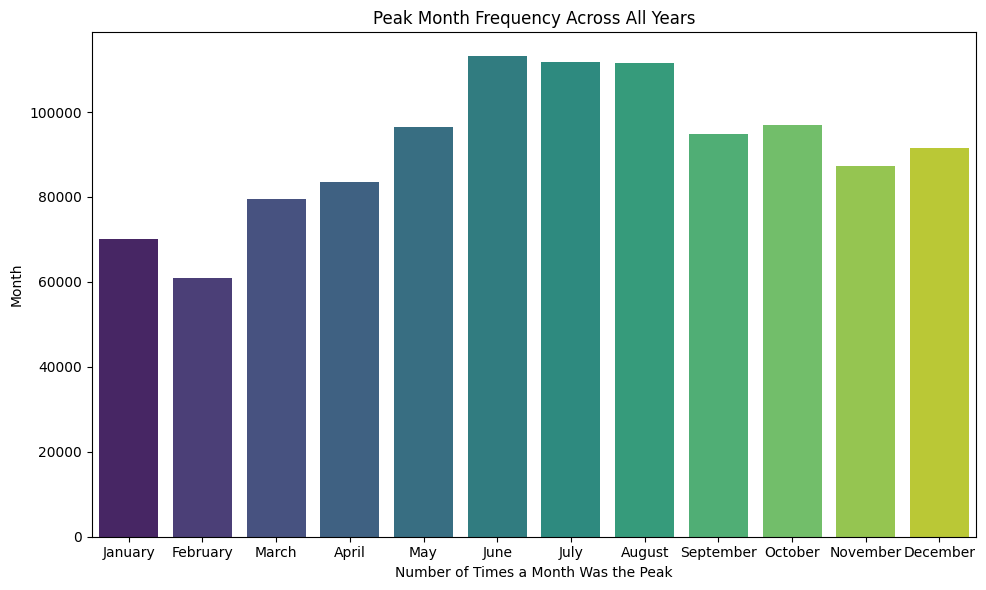

In [ ]:
# Ensure 'Date Recorded' is in datetime format
df['Date Recorded'] = pd.to_datetime(df['Date Recorded'], errors='coerce')

# Extract month name
df['Month Name'] = df['Date Recorded'].dt.month_name()

# Define month order
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

# Convert to categorical with order
df['Month Name'] = pd.Categorical(df['Month Name'], categories=month_order, ordered=True)

# Count values and drop NaN months (if any)
month_counts = df['Month Name'].value_counts().sort_index()

# Plot as horizontal bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x=month_counts.index, y=month_counts.values, palette='viridis')
plt.title('Peak Month Frequency Across All Years')
plt.xlabel('Number of Times a Month Was the Peak')
plt.ylabel('Month')
plt.tight_layout()
plt.show()

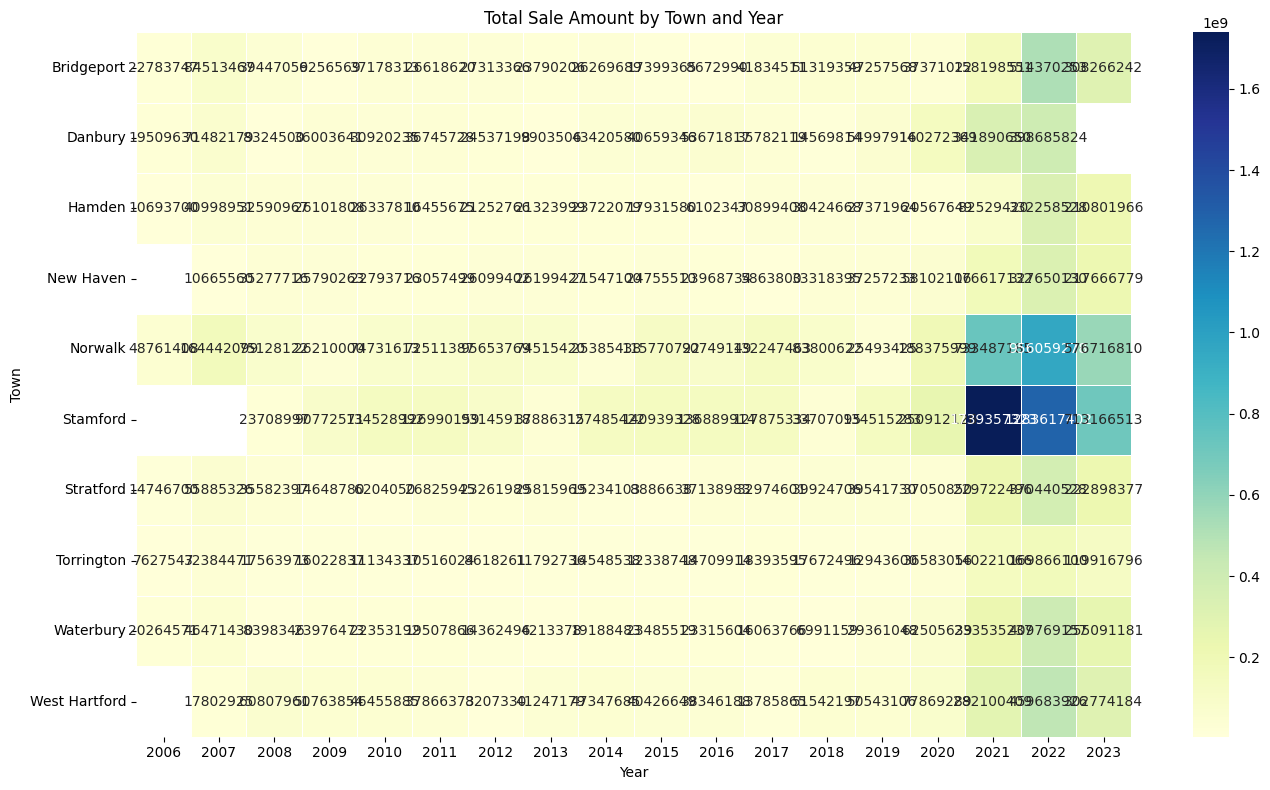

In [ ]:
# Ensure correct datetime format and extract year
cleaned_df['Date Recorded'] = pd.to_datetime(cleaned_df['Date Recorded'], errors='coerce')
cleaned_df['Year'] = cleaned_df['Date Recorded'].dt.year

# Drop rows with missing Town, Year, or Sale Amount
df_filtered = cleaned_df.dropna(subset=['Town', 'Year', 'Sale Amount'])

# Step 1: Get top 10 towns by total number of records
top_towns = df_filtered['Town'].value_counts().nlargest(10).index

# Step 2: Filter for those towns only
df_top_towns = df_filtered[df_filtered['Town'].isin(top_towns)]

# Step 3: Group by Town and Year and sum Sale Amount
grouped = df_top_towns.groupby(['Town', 'Year'])['Sale Amount'].sum().reset_index()

# Step 4: Pivot table to create heatmap-ready structure
heatmap_data = grouped.pivot(index='Town', columns='Year', values='Sale Amount')

# Step 5: Plot heatmap
plt.figure(figsize=(14, 8))
sns.heatmap(heatmap_data, cmap='YlGnBu', linewidths=0.5, annot=True, fmt='.0f')
plt.title('Total Sale Amount by Town and Year')
plt.xlabel('Year')
plt.ylabel('Town')
plt.tight_layout()
plt.show()

<ipython-input-179-4f857b68eaf0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_towns.index, y=top_towns.values, palette='mako')


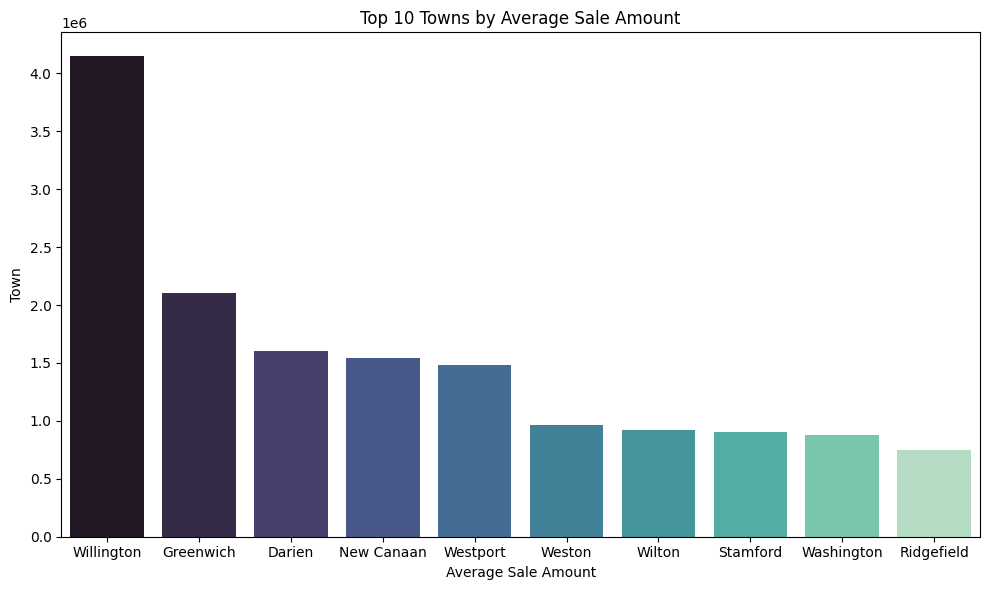

In [ ]:

top_towns = df.groupby('Town')['Sale Amount'].mean().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_towns.index, y=top_towns.values, palette='mako')
plt.title("Top 10 Towns by Average Sale Amount")
plt.xlabel("Average Sale Amount")
plt.ylabel("Town")
plt.tight_layout()
plt.show()



<ipython-input-163-59a5aebe61d6>:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = cleaned_df.set_index('Date Recorded').resample('M')['Sale Amount'].sum()


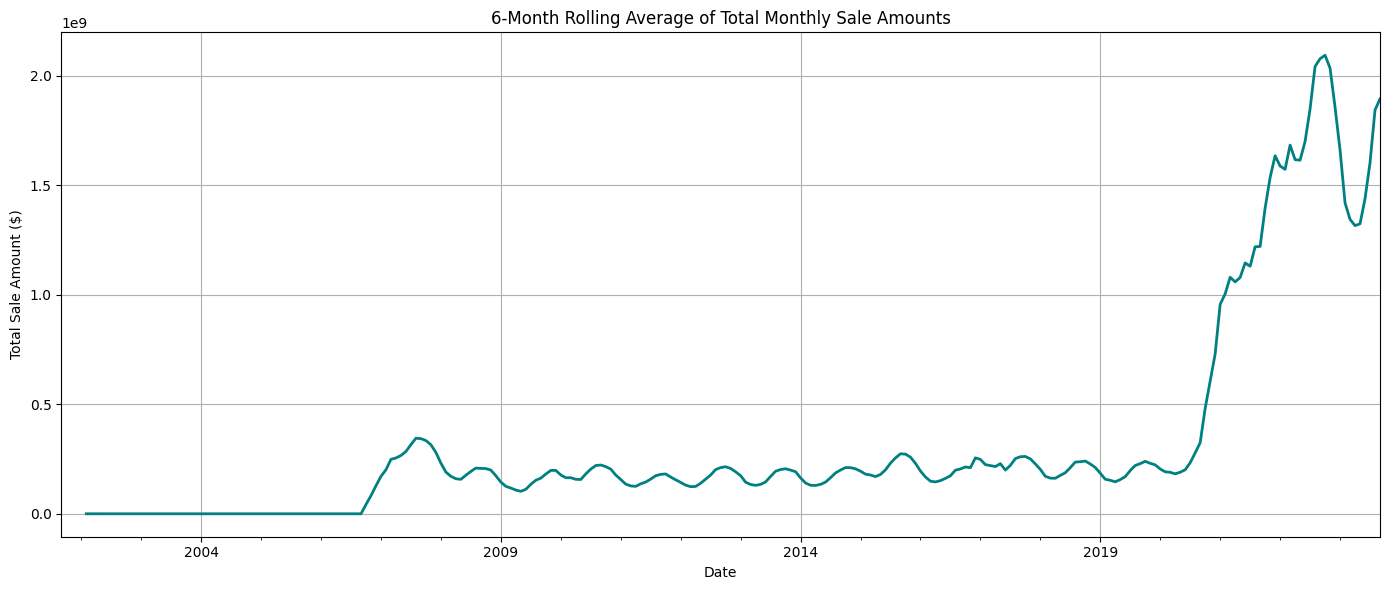

In [ ]:
# Ensure 'Date Recorded' is datetime and set index
cleaned_df['Date Recorded'] = pd.to_datetime(cleaned_df['Date Recorded'], errors='coerce')
monthly_sales = cleaned_df.set_index('Date Recorded').resample('M')['Sale Amount'].sum()

# Plot rolling average
plt.figure(figsize=(14, 6))
monthly_sales.rolling(window=6).mean().plot(color='teal', linewidth=2)
plt.title('6-Month Rolling Average of Total Monthly Sale Amounts')
plt.ylabel('Total Sale Amount ($)')
plt.xlabel('Date')
plt.grid(True)
plt.tight_layout()
plt.show()


<ipython-input-182-585b07b64480>:7: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(data=filtered_violin, x='Town', y='Sale Amount', scale='width', inner='quartile')


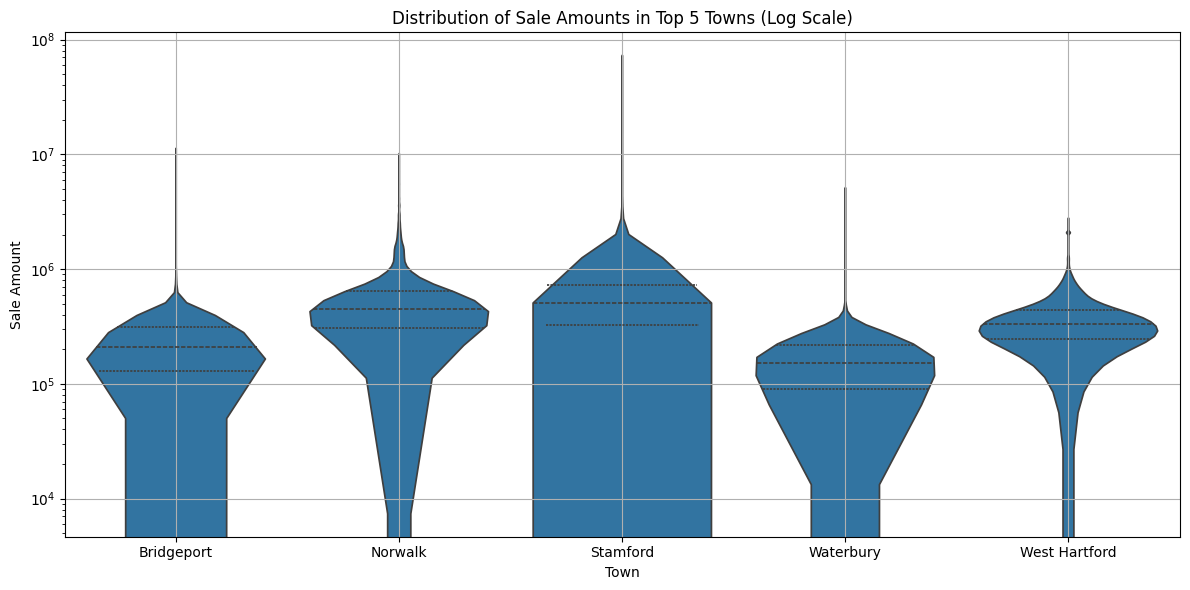

In [ ]:
# Get top 5 towns by count
top_5_towns = cleaned_df['Town'].value_counts().nlargest(5).index
filtered_violin = cleaned_df[cleaned_df['Town'].isin(top_5_towns)]

# Plot violin plot
plt.figure(figsize=(12, 6))
sns.violinplot(data=filtered_violin, x='Town', y='Sale Amount', scale='width', inner='quartile')
plt.yscale('log')
plt.title('Distribution of Sale Amounts in Top 5 Towns (Log Scale)')
plt.grid(True)
plt.tight_layout()
plt.show()

<ipython-input-185-957b7314b8fc>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_town_transaction_counts.values, y=top_town_transaction_counts.index, palette='Set2')


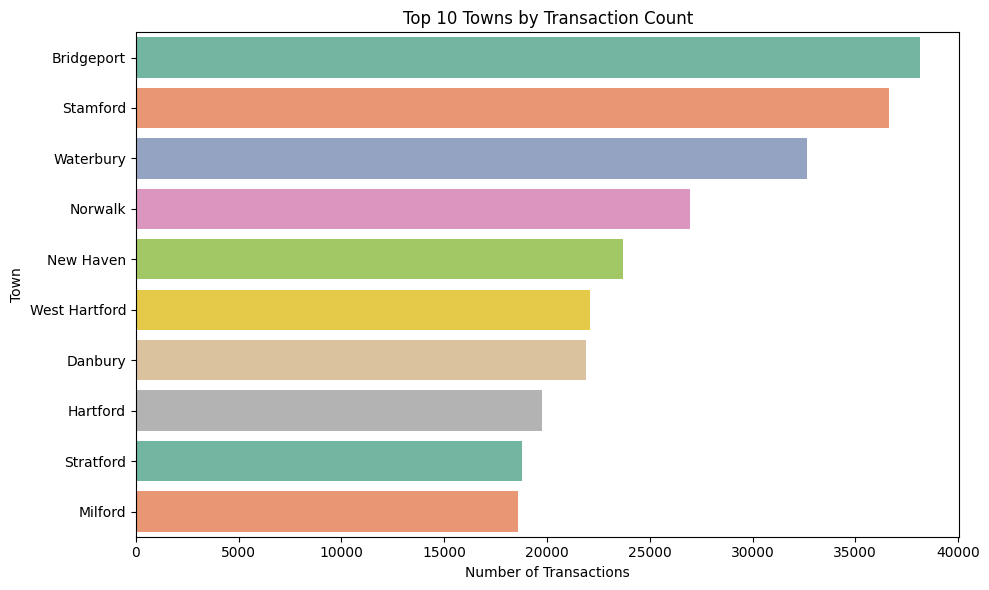

In [ ]:
# Bar Chart: Top 10 Towns by Transaction Count
top_town_transaction_counts = df['Town'].value_counts().head(10)

plt.figure(figsize=(10, 6))
sns.barplot(x=top_town_transaction_counts.values, y=top_town_transaction_counts.index, palette='Set2')
plt.title('Top 10 Towns by Transaction Count')
plt.xlabel('Number of Transactions')
plt.ylabel('Town')
plt.tight_layout()
plt.show()


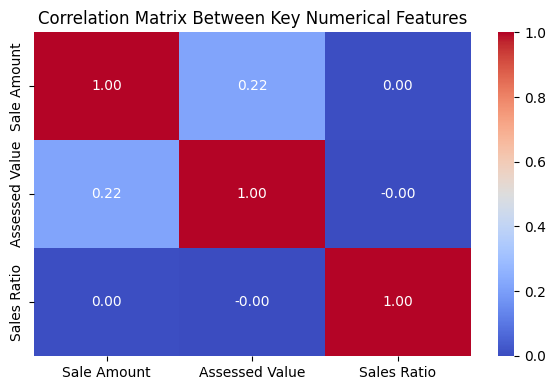

In [ ]:
# Add Sales Ratio if not present
if 'Sales Ratio' not in cleaned_df.columns and 'Assessed Value' in cleaned_df.columns:
    cleaned_df['Sales Ratio'] = cleaned_df['Sale Amount'] / cleaned_df['Assessed Value']
    cleaned_df['Sales Ratio'].replace([np.inf, -np.inf], np.nan, inplace=True)

# Plot correlation heatmap
numeric_cols = ['Sale Amount', 'Assessed Value', 'Sales Ratio']
corr_matrix = cleaned_df[numeric_cols].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix Between Key Numerical Features')
plt.tight_layout()
plt.show()


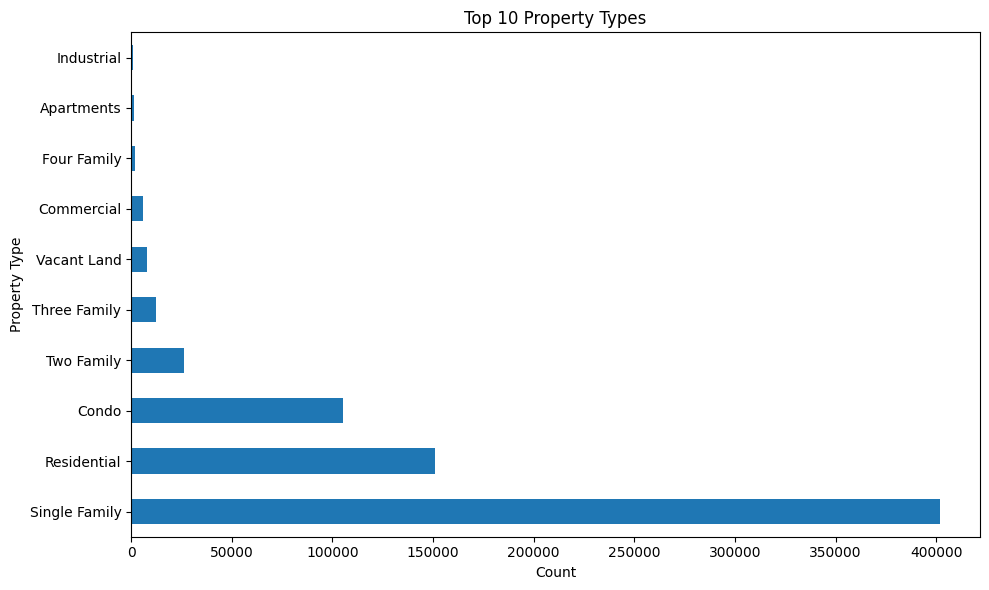

In [ ]:
plt.figure(figsize=(10, 6))
df['Property Type'].value_counts().head(10).plot(kind='barh')
plt.title("Top 10 Property Types")
plt.xlabel("Count")
plt.tight_layout()
plt.show()
